# WalMart Trip Type

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import math

import tools

plt.rcParams["figure.figsize"] = (10, 8)
mpl.style.use('bmh')
%matplotlib inline

tools loaded


/Volumes/Data/Anthony/projects/development/virtualenvs/machine-learning/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv('input/train.csv')

In [3]:
u = df.groupby('VisitNumber')

## Look at a visit

In [4]:
u.get_group(8)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017
5,26,8,Friday,2006618783,2,PAINT AND ACCESSORIES,1017
6,26,8,Friday,2006613743,1,PAINT AND ACCESSORIES,1017
7,26,8,Friday,7004802737,1,PAINT AND ACCESSORIES,2802
8,26,8,Friday,2238495318,1,PAINT AND ACCESSORIES,4501
9,26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565
10,26,8,Friday,5200010239,1,DSD GROCERY,4606
11,26,8,Friday,88679300501,2,PAINT AND ACCESSORIES,3504
12,26,8,Friday,22006000000,1,MEAT - FRESH & FROZEN,6009


## How many unique items of each column are there?

In [5]:
[(x, len(df[x].unique())) for x in ['TripType', 'Upc', 'Weekday', 'DepartmentDescription', 'FinelineNumber']]

[('TripType', 38),
 ('Upc', 97715),
 ('Weekday', 7),
 ('DepartmentDescription', 69),
 ('FinelineNumber', 5196)]

## What are the DepartmentDescription Factors?

In [7]:
dds = [repr(x) for x in list(set(df['DepartmentDescription']))]
dds.sort()
for d in dds:
    print(d)

'1-HR PHOTO'
'ACCESSORIES'
'AUTOMOTIVE'
'BAKERY'
'BATH AND SHOWER'
'BEAUTY'
'BEDDING'
'BOOKS AND MAGAZINES'
'BOYS WEAR'
'BRAS & SHAPEWEAR'
'CAMERAS AND SUPPLIES'
'CANDY, TOBACCO, COOKIES'
'CELEBRATION'
'COMM BREAD'
'CONCEPT STORES'
'COOK AND DINE'
'DAIRY'
'DSD GROCERY'
'ELECTRONICS'
'FABRICS AND CRAFTS'
'FINANCIAL SERVICES'
'FROZEN FOODS'
'FURNITURE'
'GIRLS WEAR, 4-6X  AND 7-14'
'GROCERY DRY GOODS'
'HARDWARE'
'HEALTH AND BEAUTY AIDS'
'HOME DECOR'
'HOME MANAGEMENT'
'HORTICULTURE AND ACCESS'
'HOUSEHOLD CHEMICALS/SUPP'
'HOUSEHOLD PAPER GOODS'
'IMPULSE MERCHANDISE'
'INFANT APPAREL'
'INFANT CONSUMABLE HARDLINES'
'JEWELRY AND SUNGLASSES'
'LADIES SOCKS'
'LADIESWEAR'
'LARGE HOUSEHOLD GOODS'
'LAWN AND GARDEN'
'LIQUOR,WINE,BEER'
'MEAT - FRESH & FROZEN'
'MEDIA AND GAMING'
'MENS WEAR'
'MENSWEAR'
'OFFICE SUPPLIES'
'OPTICAL - FRAMES'
'OPTICAL - LENSES'
'OTHER DEPARTMENTS'
'PAINT AND ACCESSORIES'
'PERSONAL CARE'
'PETS AND SUPPLIES'
'PHARMACY OTC'
'PHARMACY RX'
'PLAYERS AND ELECTRONICS'
'PLUS AND MATE

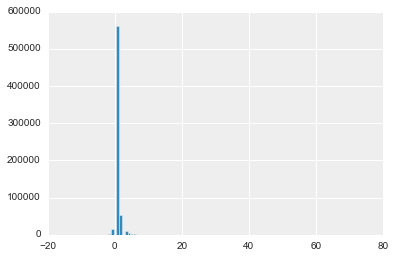

In [8]:
df['ScanCount'].describe()
df['ScanCount'].hist(bins=100)

## How many NA's are there by column?

In [9]:
df.isnull().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64

### What is the overlap between missing NAs in different columns?

In [10]:
len(df[df['DepartmentDescription'].isnull() & df['Upc'].isnull()])

1361

In [11]:
len(df[df['DepartmentDescription'].isnull() & df['FinelineNumber'].notnull()])

0

In [12]:
len(df[df['FinelineNumber'].isnull() & df['Upc'].notnull()])

0

### When finelineNumber or Upc is NA, what departments do they come from (when not also NA)?

In [13]:
df[df['FinelineNumber'].isnull() & df['DepartmentDescription'].notnull()]['DepartmentDescription'].value_counts()

PHARMACY RX    2768
Name: DepartmentDescription, dtype: int64

In [14]:
df[df['Upc'].isnull() & df['DepartmentDescription'].notnull()]['DepartmentDescription'].value_counts()

PHARMACY RX    2768
Name: DepartmentDescription, dtype: int64

### When Upc is NA, what are the scan counts?

In [15]:
df[df['Upc'].isnull() & df['DepartmentDescription'].notnull()]['ScanCount'].value_counts()

 1    2697
-1      67
 2       4
Name: ScanCount, dtype: int64

In [16]:
df[df['FinelineNumber'].isnull() & df['DepartmentDescription'].notnull()]['ScanCount'].value_counts()

 1    2697
-1      67
 2       4
Name: ScanCount, dtype: int64

## TripType by FineLineNumber

In [29]:
pd.crosstab(index=df['FinelineNumber'], columns=df['TripType']).idxmax()

TripType
3       277
4      1110
5      5501
6      8012
7      8014
8       808
9      1805
12       31
14     7949
15     1805
18     5330
19     1264
20     3004
21     3550
22     9640
23      818
24     8103
25      324
26     9803
27     5501
28     5805
29     6110
30      135
31     9998
32     3175
33     8945
34     1946
35      808
36      203
37     5501
38     1508
39     5501
40     5501
41      135
42     1805
43        0
44        0
999     279
dtype: float64

## Most common DepartmentDescription for each TripType

In [18]:
pd.crosstab(index=df['DepartmentDescription'], columns=df['TripType']).idxmax()

TripType
3               FINANCIAL SERVICES
4                     PHARMACY OTC
5                     PHARMACY OTC
6                 LIQUOR,WINE,BEER
7                     SERVICE DELI
8                      DSD GROCERY
9                        MENS WEAR
12                     DSD GROCERY
14              FABRICS AND CRAFTS
15                     CELEBRATION
18                            TOYS
19                     ELECTRONICS
20                      AUTOMOTIVE
21              FABRICS AND CRAFTS
22                     ELECTRONICS
23         PLAYERS AND ELECTRONICS
24                   COOK AND DINE
25                       MENS WEAR
26                        HARDWARE
27                 LAWN AND GARDEN
28                  SPORTING GOODS
29                            TOYS
30                           SHOES
31                        WIRELESS
32     INFANT CONSUMABLE HARDLINES
33        HOUSEHOLD CHEMICALS/SUPP
34               PETS AND SUPPLIES
35                     DSD GROCERY
36         

## Most common Weekday for each TripType

In [19]:
pd.crosstab(index=df['Weekday'], columns=df['TripType']).idxmax()

TripType
3        Friday
4      Saturday
5      Saturday
6      Saturday
7        Sunday
8        Sunday
9      Saturday
12     Saturday
14       Monday
15     Saturday
18     Saturday
19       Friday
20       Sunday
21       Monday
22     Saturday
23       Sunday
24     Saturday
25       Sunday
26       Sunday
27     Saturday
28     Saturday
29     Saturday
30       Sunday
31     Saturday
32       Sunday
33       Sunday
34     Saturday
35       Sunday
36     Saturday
37       Sunday
38       Sunday
39       Sunday
40       Sunday
41       Sunday
42       Sunday
43     Saturday
44     Saturday
999    Saturday
dtype: object

## Most common TripType for each weekday

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d8269b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11dbd0278>]], dtype=object)

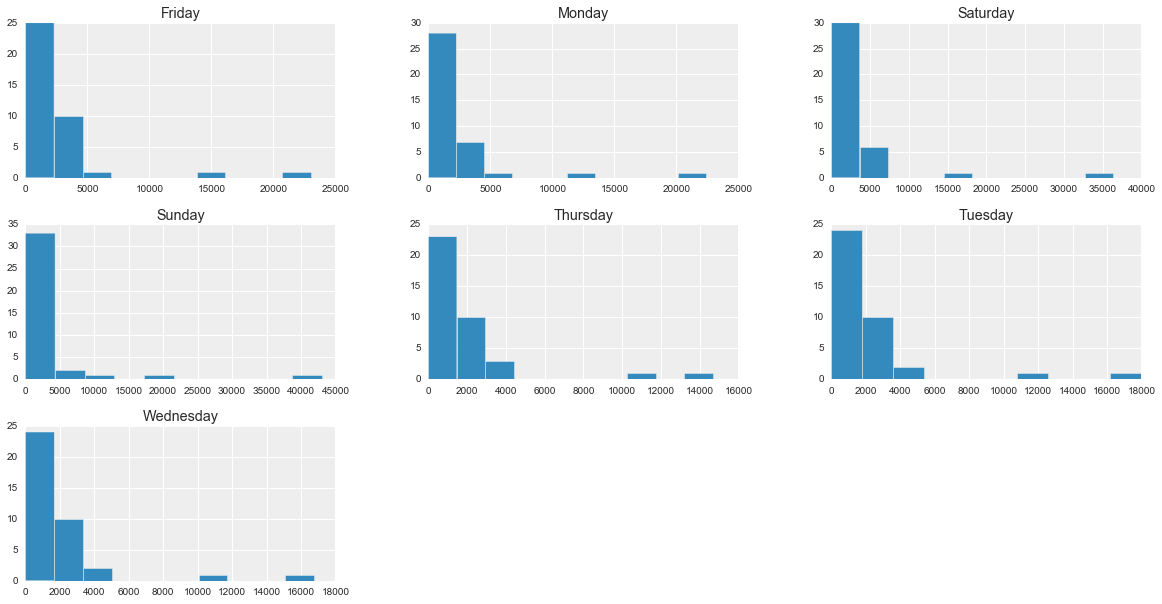

In [36]:
pd.crosstab(index=df['TripType'], columns=df['Weekday']).hist(figsize=(20,10))


# Clean data

In [ ]:
dd = (df.pivot_table('ScanCount', ['VisitNumber'], ['DepartmentDescription']))
fln = df.pivot_table('ScanCount', ['VisitNumber'], ['FinelineNumber'])
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wd = df[['VisitNumber', 'Weekday']].drop_duplicates(subset='VisitNumber')
wd['Weekday'] = wd['Weekday'].apply(lambda x: weekdays.index(x))

trip_type = df[['VisitNumber', 'TripType']].drop_duplicates(subset='VisitNumber')

In [8]:
dd = df[['VisitNumber', 'TripType']].drop_duplicates()

In [10]:
dd['TripType'].value_counts()

8      12161
39      9896
9       9464
999     8444
40      6130
7       5752
5       4570
25      3698
3       3633
36      3005
38      2912
37      2788
24      2609
35      2030
32      1984
42      1858
33      1315
6       1262
44      1187
30      1081
15       978
22       928
43       872
27       785
34       719
21       641
20       637
31       594
41       583
18       549
26       503
28       492
29       433
19       375
4        342
12       269
23       139
14         4
Name: TripType, dtype: int64

In [ ]:
result = trip_type.join(dd, on='VisitNumber')
result = result.join(fln, on='VisitNumber')
result['Weekday'] = wd['Weekday']
result2 = result.fillna(0.0)
result2

In [ ]:
df['Returns'] = df['ScanCount'].apply(lambda x: 1 if x < 0 else 0)
rtns = df.pivot_table('Returns', ['VisitNumber'], aggfunc=sum)
rtns.apply(lambda x: 1 if x > 0 else 0)

In [39]:
dd = list(set(df['DepartmentDescription'].fillna('')))
dd.sort()
dd

['',
 '1-HR PHOTO',
 'ACCESSORIES',
 'AUTOMOTIVE',
 'BAKERY',
 'BATH AND SHOWER',
 'BEAUTY',
 'BEDDING',
 'BOOKS AND MAGAZINES',
 'BOYS WEAR',
 'BRAS & SHAPEWEAR',
 'CAMERAS AND SUPPLIES',
 'CANDY, TOBACCO, COOKIES',
 'CELEBRATION',
 'COMM BREAD',
 'CONCEPT STORES',
 'COOK AND DINE',
 'DAIRY',
 'DSD GROCERY',
 'ELECTRONICS',
 'FABRICS AND CRAFTS',
 'FINANCIAL SERVICES',
 'FROZEN FOODS',
 'FURNITURE',
 'GIRLS WEAR, 4-6X  AND 7-14',
 'GROCERY DRY GOODS',
 'HARDWARE',
 'HEALTH AND BEAUTY AIDS',
 'HOME DECOR',
 'HOME MANAGEMENT',
 'HORTICULTURE AND ACCESS',
 'HOUSEHOLD CHEMICALS/SUPP',
 'HOUSEHOLD PAPER GOODS',
 'IMPULSE MERCHANDISE',
 'INFANT APPAREL',
 'INFANT CONSUMABLE HARDLINES',
 'JEWELRY AND SUNGLASSES',
 'LADIES SOCKS',
 'LADIESWEAR',
 'LARGE HOUSEHOLD GOODS',
 'LAWN AND GARDEN',
 'LIQUOR,WINE,BEER',
 'MEAT - FRESH & FROZEN',
 'MEDIA AND GAMING',
 'MENS WEAR',
 'MENSWEAR',
 'OFFICE SUPPLIES',
 'OPTICAL - FRAMES',
 'OPTICAL - LENSES',
 'OTHER DEPARTMENTS',
 'PAINT AND ACCESSORIES',


In [6]:
vcs = df['Upc'].value_counts()
for x in [int(x) for x in list(vcs.head(2000).index)]:
    print('{}, '.format(x))

4011, 
60538862097, 
7874235186, 
7874235187, 
4046, 
68113107862, 
60538871457, 
3338320027, 
4087, 
60538871461, 
4900000044, 
4062, 
4065, 
4900003165, 
3338365020, 
7874235188, 
4900005010, 
68113163351, 
60538896309, 
4078, 
69922162117, 
7874211433, 
4093, 
4900000977, 
20966500000, 
60538819035, 
7874235201, 
4051, 
7225003706, 
3151, 
60538862128, 
7874235200, 
4022, 
6827473529, 
20108800000, 
60538812238, 
4900000764, 
78035378403, 
20154500000, 
20154200000, 
7874222803, 
1200001311, 
4050, 
75752800879, 
4178900121, 
20108700000, 
68113176761, 
7432309090, 
68113163352, 
68113163353, 
4048, 
4016, 
7874201228, 
4135, 
3800057608, 
4045, 
4958, 
4889, 
3082, 
7874203524, 
7084781116, 
60538812237, 
60538812236, 
7874209728, 
3107, 
7294560136, 
7976503128, 
4900001463, 
4178900125, 
68113189617, 
4900002890, 
61126999100, 
4000042431, 
7874298393, 
1200080994, 
7225003712, 
9518801128, 
4900001278, 
4900005015, 
68113102889, 
7874203952, 
4693, 
3338360002, 
3338311000, 
490